In [2]:
import random
import numpy as np
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, mean_squared_error

C:\Users\disrct\AppData\Local\Temp\ipykernel_24352\2321634595.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [23]:
df = pd.read_csv('meteor.csv')

In [24]:
le = LabelEncoder()
df = df.drop(['name', 'id', 'nametype', 'fall', 'GeoLocation'], axis = 1)

for x in df.index:
  if df.loc[x, 'mass'] > 16000:
    df.drop(x, inplace = True)
  elif df.loc[x, 'mass'] < 0:
    df.drop(x, inplace = True)

df['recclass'] = le.fit_transform(df['recclass'])

df = df.dropna()

<Axes: xlabel='reclong', ylabel='reclat'>

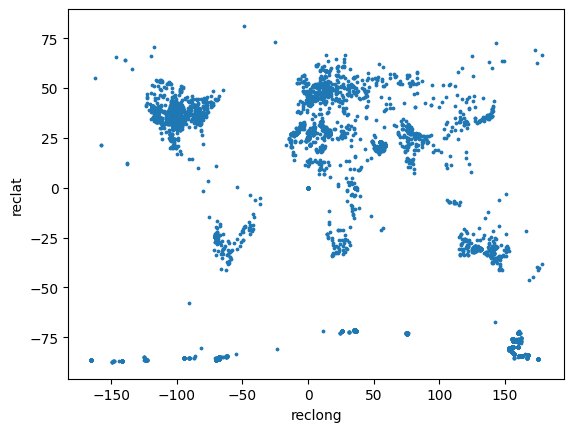

In [6]:
df.plot.scatter(x = 'reclong', y = 'reclat', s = 3)

In [25]:
Y = df['mass']

X = df.drop(['mass'], axis = 1)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, random_state = 42)

In [9]:
## Linear Regression Mass
model = LinearRegression()
model.fit(X_train, Y_train)

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)

Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)

print("r2 score: ", r2_score(Y, model.predict(X)))
print("Erro de treino: ", train_error, "/ Erro de teste: ", test_error)

# dump(model, "linearRegression.pkl")

r2 score:  0.1645752151961084
Erro de treino:  581.4143230634055 / Erro de teste:  560.2903599174712


In [10]:
## Decision Tree Mass

# model = DecisionTreeRegressor()

model = GridSearchCV(
    DecisionTreeRegressor(),
    {
        'max_depth': list(map(lambda x: x, range(1, 100))), 
        'min_samples_split': list(map(lambda x: x, range(2, 10))),
        'min_samples_leaf': list(map(lambda x: x, range(1, 10))),
    },
    n_jobs=-1
)
model.fit(X_train, Y_train)
print(model.best_params_)

model = model.best_estimator_

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)

Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)

# dump(model, "decisionTree.pkl")

print("r2 score: ", r2_score(Y, model.predict(X)))
print("Erro de treino: ", train_error, "/ Erro de teste: ", test_error)

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 3}
r2 score:  0.25746364451882087
Erro de treino:  492.36775672574083 / Erro de teste:  490.8643308598654


In [11]:
## Elastic net Mass

model = GridSearchCV(
    ElasticNet(fit_intercept = True),
    {
        'alpha': list(map(lambda x: x, range(1, 10))),
        'l1_ratio': list(map(lambda x: x / 10, range(1, 10))),
        'tol': list(map(lambda x: x * 1e-5, range(1, 10))),
    },
    n_jobs=-1,
)

model.fit(X_train, Y_train)
print(model.best_params_)

model = model.best_estimator_

print("r2 score: ", r2_score(Y, model.predict(X)))
print("mean absolute error: ", mean_absolute_error(Y, model.predict(X)))

# dump(model, "elasticNet.pkl")

{'alpha': 9, 'l1_ratio': 0.1, 'tol': 2e-05}
r2 score:  0.164544948695993
mean absolute error:  579.57208986392


In [12]:
## SGD Regressor Mass

model = GridSearchCV(
    SGDRegressor(),
    {
        'alpha': list(map(lambda x: x * 1e-5, range(1, 10))),
        'l1_ratio': list(map(lambda x: x / 10, range(1, 10))),
        'tol': list(map(lambda x: x * 1e-5, range(1, 10)))
    },
    n_jobs=-1,
)

model.fit(X_train, Y_train)
print(model.best_params_)

model = model.best_estimator_

print("r2 score: ", r2_score(Y, model.predict(X)))
print("mean absolute error: ", mean_absolute_error(Y, model.predict(X)))

# dump(model, "sgdRegressor.pkl")

{'alpha': 8e-05, 'l1_ratio': 0.7, 'tol': 9e-05}
r2 score:  -2.9052647395216335e+23
mean absolute error:  826396730837813.5


In [29]:
## Random Forest Regressor Mass

# model = GridSearchCV(
#     RandomForestRegressor(),
#     {
#         'max_depth': [10, 20, 30],
#         'min_samples_split': [2, 4, 6],
#         'n_estimators': [100, 200, 300]
#     },

#     n_jobs=-1,
# )

model = RandomForestRegressor(max_depth = 10, min_samples_split = 4, n_estimators = 300)

model.fit(X_train, Y_train)

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)

Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)

print("r2 score: ", r2_score(Y, model.predict(X)))
print("Erro de treino: ", train_error, "/ Erro de teste: ", test_error)
dump(model, "randomForestMass.pkl")

r2 score:  0.5139250356796585
Erro de treino:  397.3481354158792 / Erro de teste:  473.2384505810284


['randomForestMass.pkl']

In [20]:
df = pd.read_csv('meteor.csv')

In [21]:
le = LabelEncoder()
df = df.drop(['name', 'id', 'nametype', 'fall', 'GeoLocation'], axis = 1)

for x in df.index:
  if df.loc[x, 'mass'] > 16000:
    df.drop(x, inplace = True)
  elif df.loc[x, 'mass'] < 0:
    df.drop(x, inplace = True)

df['recclass'] = le.fit_transform(df['recclass'])

df = df.dropna()

In [22]:
Y = df['reclat']

X = df.drop(['reclat'], axis = 1)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [26]:
## Linear Regression Latitude

model = LinearRegression()
model.fit(X_train, Y_train)

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)

Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)

print("Erro de treino: ", train_error, "/ Erro de teste: ", test_error)

# dump(model, "linearRegression.pkl")

lat_real = Y_real.tolist()
lat_pred = Y_pred.tolist()

Erro de treino:  28.09028146784325 / Erro de teste:  28.027111995013147


In [27]:
## Decision Tree Default Latitude

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)

Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)

print("Erro de treino: ", train_error, "/ Erro de teste: ", test_error)

# dump(model, "decisionTree.pkl")

lat_real = Y_real.tolist()
lat_pred = Y_pred.tolist()

Erro de treino:  0.015677521617555822 / Erro de teste:  1.176904206228813


In [28]:
## Decision Tree Changed Latitude
model = DecisionTreeRegressor(max_depth = 25, min_samples_split = 6)
model.fit(X_train, Y_train)

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)

Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)

print("Erro de treino: ", train_error, "/ Erro de teste: ", test_error)

# dump(model, "decisionTreeModified.pkl")

lat_real = Y_real.tolist()
lat_pred = Y_pred.tolist()

Erro de treino:  0.34897691614803855 / Erro de teste:  1.2484425867389086


In [29]:
## Elastic net Latitude

model = GridSearchCV(
    ElasticNet(fit_intercept = True),
    {
        'alpha': list(map(lambda x: x, range(1, 10))),
        'l1_ratio': list(map(lambda x: x / 10, range(1, 10))),
        'tol': list(map(lambda x: x * 1e-5, range(1, 10))),
    },
    n_jobs=-1,
)

model.fit(X_train, Y_train)
print(model.best_params_)

model = model.best_estimator_

print("r2 score: ", r2_score(Y, model.predict(X)))
print("mean absolute error: ", mean_absolute_error(Y, model.predict(X)))

# dump(model, "elasticNet.pkl")

lat_real = Y_real.tolist()
lat_pred = Y_pred.tolist()

{'alpha': 9, 'l1_ratio': 0.6, 'tol': 8e-05}
r2 score:  0.38304698154512296
mean absolute error:  28.144815458648825


In [30]:
## SGD Regressor Latitude

model = GridSearchCV(
    SGDRegressor(),
    {
        'alpha': list(map(lambda x: x * 1e-5, range(1, 10))),
        'l1_ratio': list(map(lambda x: x / 10, range(1, 10))),
        'tol': list(map(lambda x: x * 1e-5, range(1, 10)))
    },
    n_jobs=-1,
)

model.fit(X_train, Y_train)
print(model.best_params_)

model = model.best_estimator_

print("r2 score: ", r2_score(Y, model.predict(X)))
print("mean absolute error: ", mean_absolute_error(Y, model.predict(X)))

# dump(model, "sgdRegressor.pkl")

lat_real = Y_real.tolist()
lat_pred = Y_pred.tolist()

{'alpha': 9e-05, 'l1_ratio': 0.1, 'tol': 7.000000000000001e-05}
r2 score:  -1.1142242861582248e+27
mean absolute error:  534012589926912.75


In [31]:
df = pd.read_csv('meteor.csv')

In [32]:
le = LabelEncoder()
df = df.drop(['name', 'id', 'nametype', 'fall', 'GeoLocation'], axis = 1)

for x in df.index:
  if df.loc[x, 'mass'] > 16000:
    df.drop(x, inplace = True)
  elif df.loc[x, 'mass'] < 0:
    df.drop(x, inplace = True)

df['recclass'] = le.fit_transform(df['recclass'])

df = df.dropna()

In [33]:
Y = df['reclong']

X = df.drop(['reclong'], axis = 1)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [35]:
## Linear Regression Longitude

model = LinearRegression()
model.fit(X_train, Y_train)

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)

Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)

print("Erro de treino: ", train_error, "/ Erro de teste: ", test_error)

# dump(model, "linearRegression.pkl")

long_real = Y_real.tolist()
long_pred = Y_pred.tolist()


Erro de treino:  53.522527686378254 / Erro de teste:  53.94580703212543


In [36]:
## Decision Tree Default Longitude

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)

Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)

print("Erro de treino: ", train_error, "/ Erro de teste: ", test_error)

# dump(model, "decisionTree.pkl")

long_real = Y_real.tolist()
long_pred = Y_pred.tolist()

Erro de treino:  0.00048222486747469403 / Erro de teste:  3.885818017784651


In [38]:
## Decision Tree Changed Longitude
model = DecisionTreeRegressor(max_depth = 25, min_samples_split = 6)
model.fit(X_train, Y_train)

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)

Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)

print("Erro de treino: ", train_error, "/ Erro de teste: ", test_error)

# dump(model, "decisionTreeModified.pkl")

long_real = Y_real.tolist()
long_pred = Y_pred.tolist()


Erro de treino:  0.9342595787946752 / Erro de teste:  3.8100399809391807


In [39]:
## Elastic net Longitude

model = GridSearchCV(
    ElasticNet(fit_intercept = True),
    {
        'alpha': list(map(lambda x: x, range(1, 10))),
        'l1_ratio': list(map(lambda x: x / 10, range(1, 10))),
        'tol': list(map(lambda x: x * 1e-5, range(1, 10))),
    },
    n_jobs=-1,
)

model.fit(X_train, Y_train)
print(model.best_params_)

model = model.best_estimator_

print("r2 score: ", r2_score(Y, model.predict(X)))
print("mean absolute error: ", mean_absolute_error(Y, model.predict(X)))

# dump(model, "elasticNet.pkl")

long_real = Y_real.tolist()
long_pred = Y_pred.tolist()

{'alpha': 4, 'l1_ratio': 0.9, 'tol': 4e-05}
r2 score:  0.351179456886084
mean absolute error:  53.56674600881931


In [40]:
## SGD Regressor Longitude

model = GridSearchCV(
    SGDRegressor(),
    {
        'alpha': list(map(lambda x: x * 1e-5, range(1, 10))),
        'l1_ratio': list(map(lambda x: x / 10, range(1, 10))),
        'tol': list(map(lambda x: x * 1e-5, range(1, 10)))
    },
    n_jobs=-1,
)

model.fit(X_train, Y_train)
print(model.best_params_)

model = model.best_estimator_

print("r2 score: ", r2_score(Y, model.predict(X)))
print("mean absolute error: ", mean_absolute_error(Y, model.predict(X)))

# dump(model, "sgdRegressor.pkl")

long_real = Y_real.tolist()
long_pred = Y_pred.tolist()

{'alpha': 2e-05, 'l1_ratio': 0.3, 'tol': 6.000000000000001e-05}
r2 score:  -2.2053692041662948e+26
mean absolute error:  979119364094529.6
